## Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Watershed Algorithm

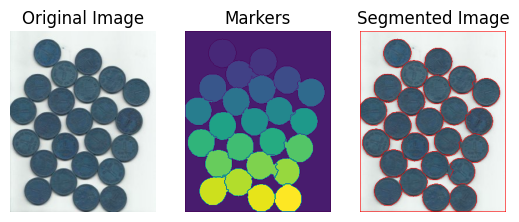

In [38]:
# loading the original image
coins = cv2.imread('coins.tif')
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_segmented = np.copy(coins)

# thresholding the image using Otsu's method
ret, coins_otsu = cv2.threshold(coins_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(coins_otsu, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# add one to all labels so that sure_background is not 0, but 1
markers = markers + 1

# now, mark the region of unknown with 0
markers[unknown == 255] = 0

# apply watershed
markers = cv2.watershed(coins_segmented, markers)
coins_segmented[markers == -1] = [255, 0, 0]

# displaying the results
plt.subplot(1, 3, 1); plt.title('Original Image'); plt.axis('off'); plt.imshow(coins)
plt.subplot(1, 3, 2); plt.title('Markers'); plt.axis('off'); plt.imshow(markers)
plt.subplot(1, 3, 3); plt.title('Segmented Image'); plt.axis('off'); plt.imshow(coins_segmented)